# **Project Name**    - Bike Sharing Demand



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -** Awanish Pandey
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# let's mount the google drive first
# from google.colab import drive
# drive.mount('/content/drive')


### Dataset Loading

In [ ]:
# Load Dataset
df=pd.read_csv('/content/SeoulBikeData.csv', encoding='latin1')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape


(8760, 14)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
Date,0
Rented Bike Count,0
Hour,0
Temperature(°C),0
Humidity(%),0
Wind speed (m/s),0
Visibility (10m),0
Dew point temperature(°C),0
Solar Radiation (MJ/m2),0
Rainfall(mm),0


<Axes: >

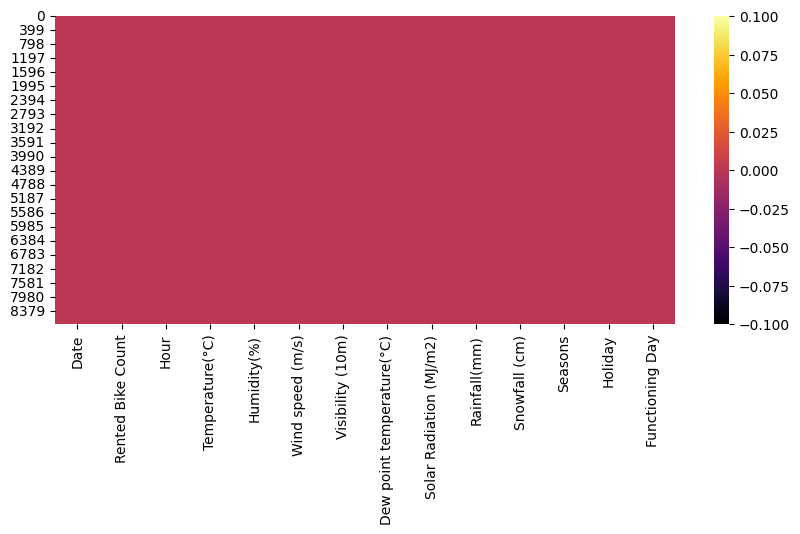

In [ ]:
# Visualizing the missing values

plt.figure(figsize=(10,4))
sns.heatmap(df.isna(), cmap = 'inferno')

From the above command, we noticed that every column has 0 null values. This seems to be clean data and there is no missing data in any of the rows and columns.



### What did you know about your dataset?

The dataset provided contains 14 columns and 8760 rows including both numerical and categorical variables. Key numerical features include temperature, humidity, wind speed, visibility, dew point temperature, solar radiation, rainfall, and snowfall. The target variable is the "Rented Bike Count," which indicates the number of bikes rented each hour. Categorical variables include seasons, holidays, and whether it was a functioning day or not. There are no missing or duplicate values in the dataset, meaning the data is complete and consistent, ready for analysis. Additionally, the dataset has both time-related information (e.g., date and hour) and weather-related data, which will help in predicting bike rentals based on external conditions.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns

df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Dataset Describe

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


### Variables Description

*   Date = Date


*   Hour = Hour of the day(0-23)



*   Tempretaure = Tempprature Of The Day


*  Humidity (%): The relative humidity, given as a percentage (integer type). It might affect how comfortable it is for people to ride bikes.





*   Wind Speed (m/s): The wind speed measured in meters per second (float type).


*   Visibility (10m): Visibility distance in units of 10 meters (integer type). Lower visibility, such as during foggy conditions, could impact bike usage.




*   Dew Point Temperature (°C): The temperature at which air becomes saturated with moisture (float type). This could influence comfort levels and thus bike rental behavior.



*   Solar Radiation (MJ/m²): The amount of solar radiation in megajoules per square meter (float type). Sunny weather may encourage people to rent bikes.




*   Rainfall (mm): The amount of rainfall in millimeters (float type). Rainy weather could negatively impact bike rental demand.



*   Snowfall (cm): The amount of snowfall in centimeters (float type). Snowy conditions are likely to reduce the number of bike rentals.




*   Seasons: The season of the observation (categorical: "Spring", "Summer", "Fall", "Winter").




*   Holiday: Whether the observation occurred on a holiday (categorical: "Yes", "No"). Bike rentals may vary depending on whether it is a holiday or a regular day.




*   Functioning Day: Indicates if the bike-sharing system was operational on that day (categorical: "Yes", "No").


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique())


No. of unique values in  Date is 365
No. of unique values in  Rented Bike Count is 2166
No. of unique values in  Hour is 24
No. of unique values in  Temperature(°C) is 546
No. of unique values in  Humidity(%) is 90
No. of unique values in  Wind speed (m/s) is 65
No. of unique values in  Visibility (10m) is 1789
No. of unique values in  Dew point temperature(°C) is 556
No. of unique values in  Solar Radiation (MJ/m2) is 345
No. of unique values in  Rainfall(mm) is 61
No. of unique values in  Snowfall (cm) is 51
No. of unique values in  Seasons is 4
No. of unique values in  Holiday is 2
No. of unique values in  Functioning Day is 2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Convert 'Date' column with a specific format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')

# Extract useful date-time features from 'Date'
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday  # 0 = Monday, 6 = Sunday

# Optional: Handle missing date conversions
missing_dates = df[df['Date'].isna()]
if not missing_dates.empty:
    print(f"Rows with missing dates:\n{missing_dates}")

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

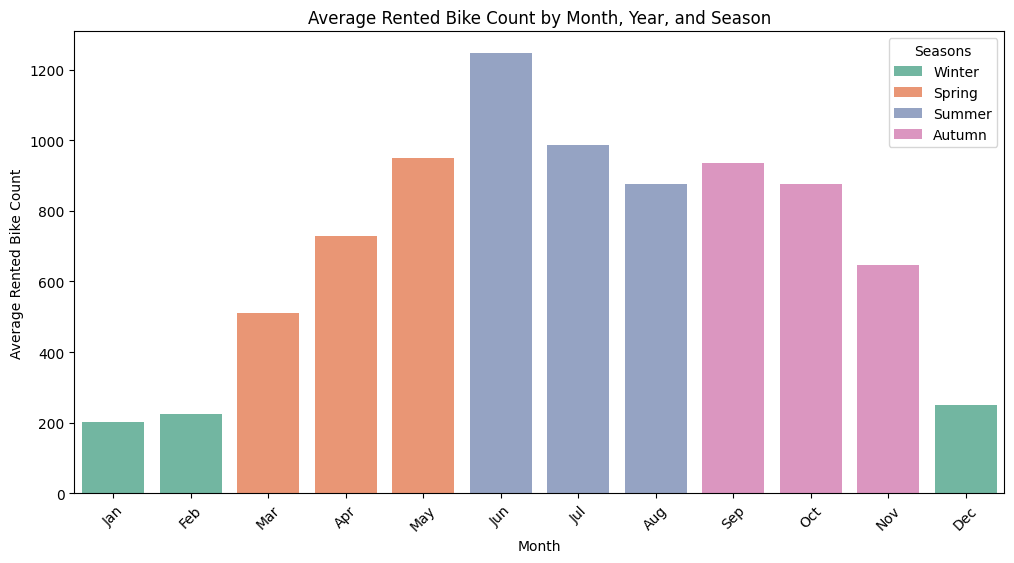

In [ ]:
# Chart - 1 visualization code
# Convert 'Date' column to datetime and extract the 'Month'
# Convert 'Date' column to datetime, extract 'Month' and 'Year'
# Convert 'Date' column to datetime, extract 'Month' and 'Year'
# Convert 'Date' column to datetime, extract 'Month' and 'Year'
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Month'] = df['Date'].dt.strftime('%b')  # Convert month number to abbreviated month name (Jan, Feb, etc.)
df['Year'] = df['Date'].dt.year

# Group by 'Year', 'Month', and 'Seasons' to calculate the average 'Rented Bike Count'
grouped_data = df.groupby(['Year', 'Month', 'Seasons'])['Rented Bike Count'].mean().reset_index()

# To ensure proper order of months, we can set the 'Month' column as a categorical type with proper ordering
months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
grouped_data['Month'] = pd.Categorical(grouped_data['Month'], categories=months_order, ordered=True)

# Plotting a bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Rented Bike Count', hue='Seasons', data=grouped_data, palette='Set2')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Average Rented Bike Count')
plt.title('Average Rented Bike Count by Month, Year, and Season')
plt.xticks(rotation=45)

# Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

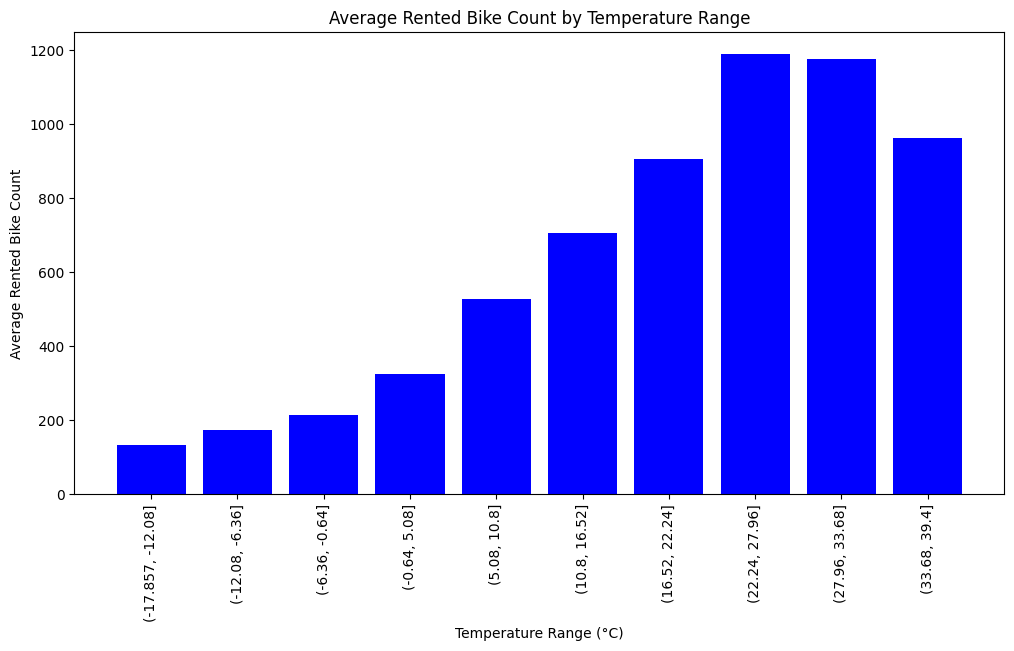

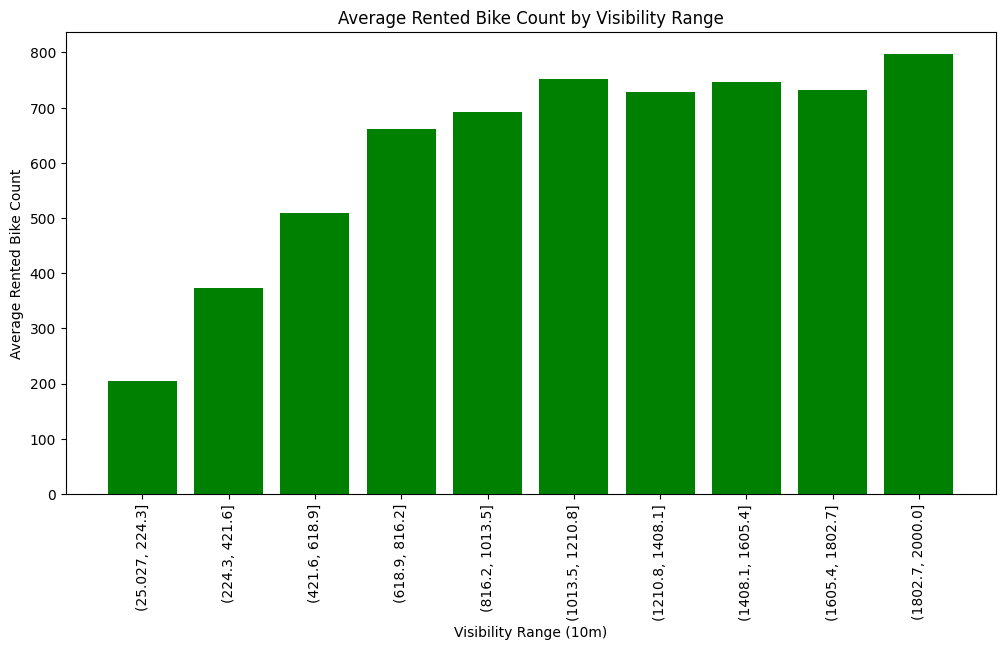

In [ ]:
# Chart - 2 visualization code
# Select relevant columns for correlation
# Aggregating data for bar plot (e.g., average rented bike count by temperature range)
temperature_bins = pd.cut(df['Temperature(°C)'], bins=10)
temperature_grouped = df.groupby(temperature_bins)['Rented Bike Count'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(temperature_grouped['Temperature(°C)'].astype(str), temperature_grouped['Rented Bike Count'], color='b')
plt.title('Average Rented Bike Count by Temperature Range')
plt.xlabel('Temperature Range (°C)')
plt.ylabel('Average Rented Bike Count')
plt.xticks(rotation=90)
plt.show()

# Aggregating data for bar plot (e.g., average rented bike count by visibility range)
visibility_bins = pd.cut(df['Visibility (10m)'], bins=10)
visibility_grouped = df.groupby(visibility_bins)['Rented Bike Count'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(visibility_grouped['Visibility (10m)'].astype(str), visibility_grouped['Rented Bike Count'], color='g')
plt.title('Average Rented Bike Count by Visibility Range')
plt.xlabel('Visibility Range (10m)')
plt.ylabel('Average Rented Bike Count')
plt.xticks(rotation=90)
plt.show()

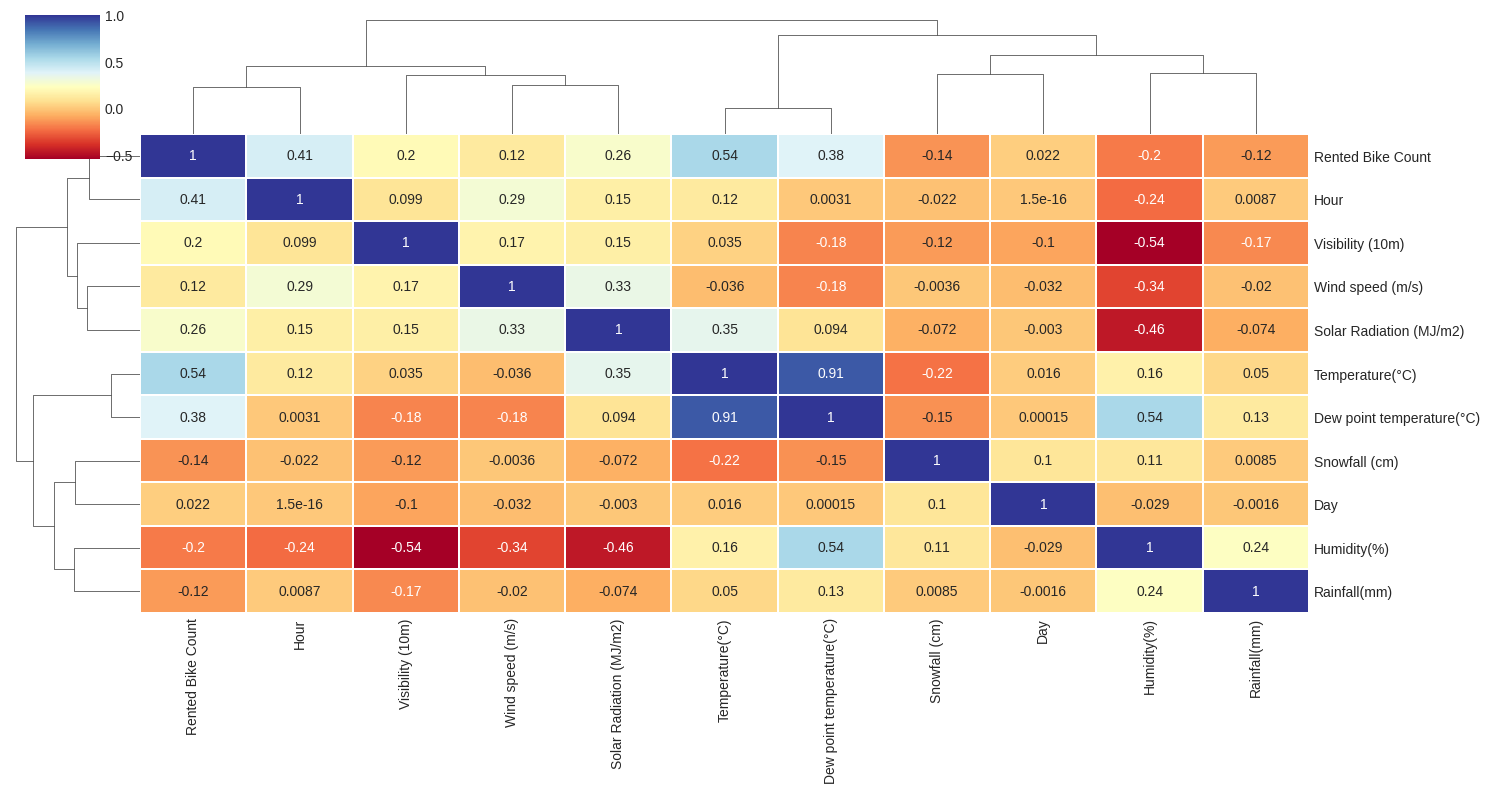

In [ ]:
# Drop non-numeric columns
df_numeric = df.drop(columns=['Date', 'Seasons', 'Holiday', 'Functioning Day', 'Month', 'Year', 'Weekday'])

# Set the style
plt.style.use('seaborn-white')

# Drop non-numeric columns from your dataset

# Ensure the remaining columns are numeric (convert if necessary)
df_numeric = df_numeric.apply(pd.to_numeric, errors='coerce')

# Calculate the correlation matrix
df_corr = df_numeric.corr()

# Plotting a clustermap
sns.clustermap(df_corr,
               cmap='RdYlBu',         # Color map
               linewidths=0.1,         # Line widths in the heatmap
               figsize=(15, 8),       # Figure size
               annot=True,             # Show correlation values
               linecolor='white',      # Color of the lines
               dendrogram_ratio=(0.1, 0.2),  # Ratio of dendrogram size
               cbar_pos=(0.02, 0.8, 0.05, 0.18), # Position of the color bar
               method='complete')       # Clustering method

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Drop non-numeric columns
df_numeric = df.drop(columns=['Date', 'Seasons', 'Holiday', 'Functioning Day'])

# Ensure remaining columns are numeric
df_numeric = df_numeric.apply(pd.to_numeric, errors='coerce')

# Calculate the correlation matrix
df_num_corr = df_numeric.corr()

# Features with high correlation
strong_features = df_num_corr[abs(df_num_corr) >= 0.5].index.tolist()

# Ensure 'Rented Bike Count' is included
strong_features.append("Rented Bike Count")

# Select the strong features from the original DataFrame
df_strong_features = df.loc[:, strong_features]

# Display the result
df_strong_features.head()


,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Year,Month,Day,Weekday,Rented Bike Count
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,2017,Dec,1,4,254
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,2017,Dec,1,4,204
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,2017,Dec,1,4,173
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,2017,Dec,1,4,107
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,2017,Dec,1,4,78


In [ ]:
# Assuming df is your existing DataFrame
# Convert 'Date' column to datetime format
df=pd.read_csv('/content/SeoulBikeData.csv', encoding='latin1')

df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')

# Extract useful date-time features from 'Date'
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday  # 0 = Monday, 6 = Sunday

# Optional: Handle missing date conversions
missing_dates = df[df['Date'].isna()]
if not missing_dates.empty:
    print(f"Rows with missing dates:\n{missing_dates}")

# Assuming the 'Date' column is already converted to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract Year, Month, Day, and WeekDay
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['WeekDay'] = df['Date'].dt.day_name()  # Gets name of the day

# Correct mapping: Monday = 1, ..., Sunday = 7
mapping_dictDay = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4,
                   'Friday': 5, 'Saturday': 6, 'Sunday': 7}
df['WeekDayEncoding'] = df['WeekDay'].map(mapping_dictDay)

# Map 'Functioning Day' and 'Holiday' to numeric values
df['Functioning Day'] = df['Functioning Day'].map({'Yes': 1, 'No': 0})
df['IsHoliday'] = df['Holiday'].map({'No Holiday': 0, 'Holiday': 1})

# Map 'Seasons' to numeric values
seasons_mapping = {'Winter': 1, 'Spring': 2, 'Summer': 3, 'Fall': 4}
df['Seasons'] = df['Seasons'].map(seasons_mapping)

# Drop redundant or duplicate columns
df.drop(columns=['Weekday', 'WeekDay', 'DayOfWeek', 'Holiday', 'Season'], inplace=True, errors='ignore')

# Display the first few rows to verify
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Functioning Day,Year,Month,Day,WeekDayEncoding,IsHoliday
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1.0,1,2017,12,1,5,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1.0,1,2017,12,1,5,0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1.0,1,2017,12,1,5,0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1.0,1,2017,12,1,5,0
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1.0,1,2017,12,1,5,0


In [ ]:
df = df[df['Functioning Day'] != 0]

contains_zero = (df['Rented Bike Count'] == 0).any()

print(f"Does 'Rented Bike Count' contain 0? {contains_zero}")

Does 'Rented Bike Count' contain 0? False


In [ ]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8465.0,729.156999,642.351166,2.0,214.0,542.00,1084.00,3556.00
Hour,8465.0,11.507029,6.920899,0.0,6.0,12.00,18.00,23.00
Temperature(°C),8465.0,12.771057,12.104375,-17.8,3.0,13.50,22.70,39.40
Humidity(%),8465.0,58.147194,20.484839,0.0,42.0,57.00,74.00,98.00
Wind speed (m/s),8465.0,1.725883,1.034281,0.0,0.9,1.50,2.30,7.40
Visibility (10m),8465.0,1433.873479,609.051229,27.0,935.0,1690.00,2000.00,2000.00
Dew point temperature(°C),8465.0,3.944997,13.242399,-30.6,-5.1,4.70,15.20,27.20
Solar Radiation (MJ/m2),8465.0,0.567868,0.868245,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8465.0,0.149120,1.125540,0.0,0.0,0.00,0.00,35.00
Snowfall (cm),8465.0,0.077685,0.444063,0.0,0.0,0.00,0.00,8.80


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test for normality on a column
stat, p_value = shapiro(df['Rented Bike Count'])
print(f'Statistics={stat}, p-value={p_value}')

if p_value > 0.05:
    print("Data looks normally distributed.")
else:
    print("Data does not look normally distributed (skewed).")


Statistics=0.8845175624375444, p-value=8.19673092662575e-62
Data does not look normally distributed (skewed).


In [ ]:
df = pd.get_dummies(df,drop_first=True)
df_numeric = df.select_dtypes(include=[np.number])
df_cat = df.select_dtypes(exclude=[np.number])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

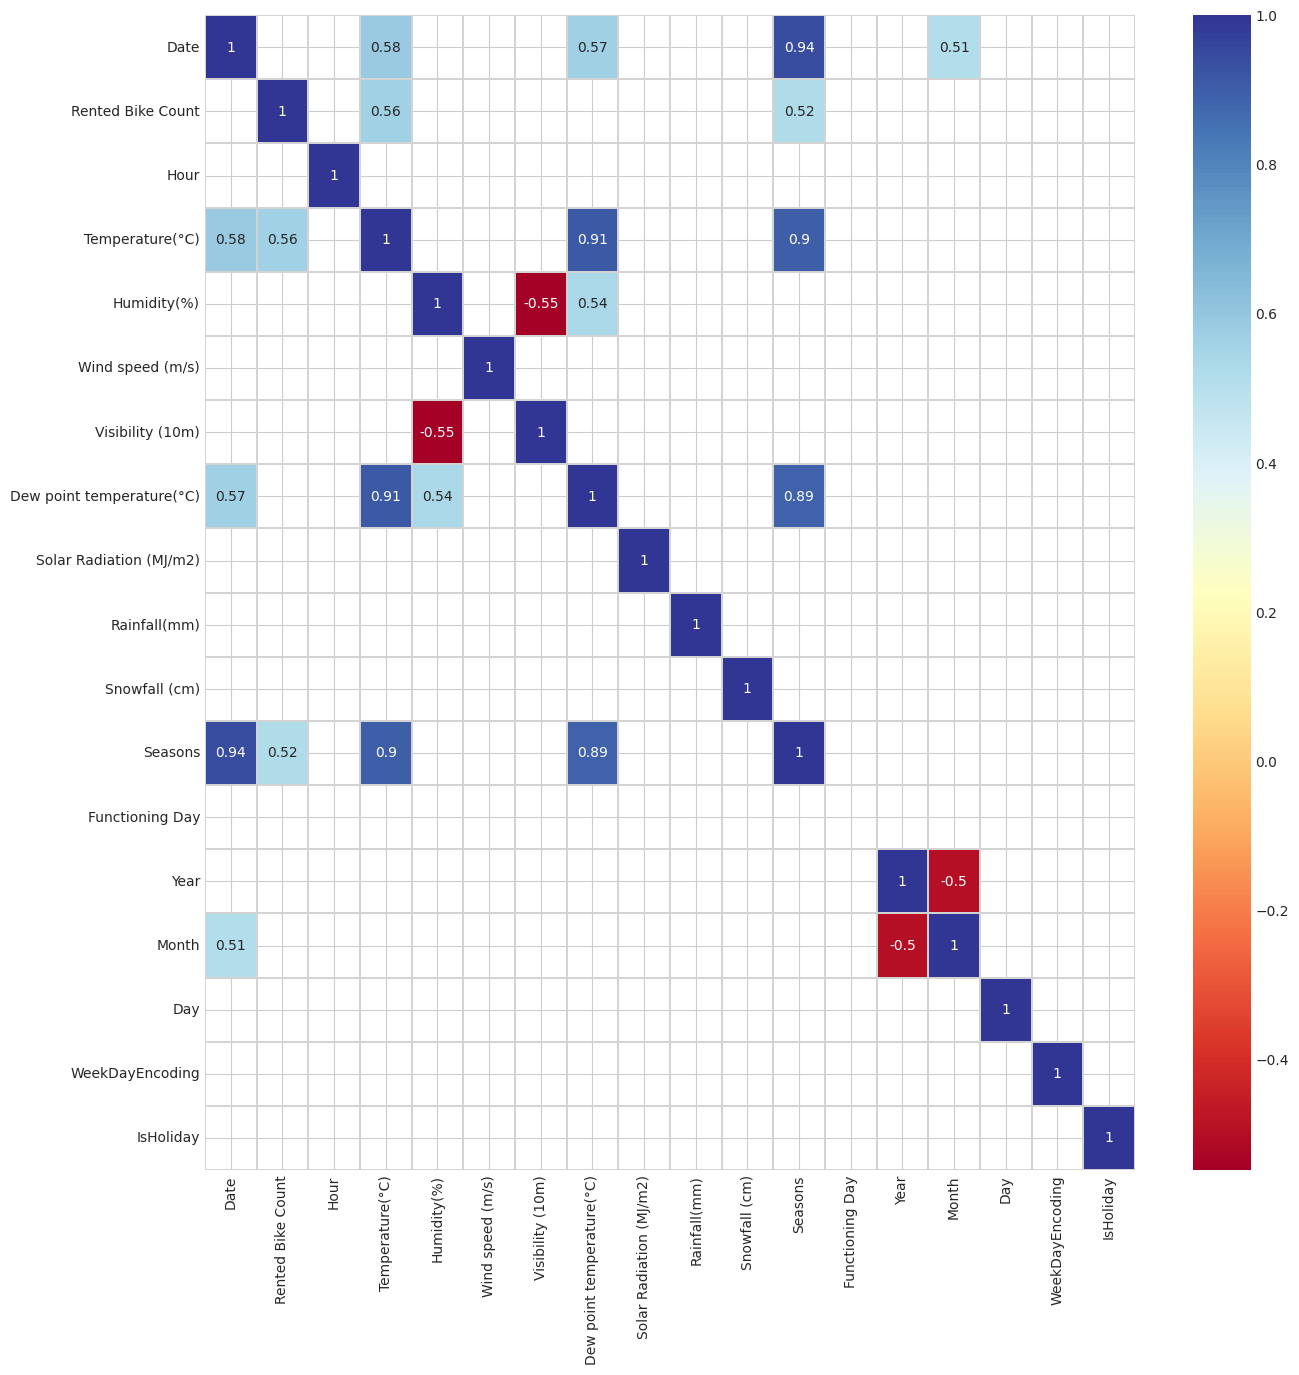

In [ ]:
# Chart - 5 visualization code

plt.figure(figsize=(15,15))
threshold = 0.5
sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster2 = df.corr()
mask = df_cluster2.where((abs(df_cluster2) >= threshold)).isna()
plot_kws={"s": 1}
sns.heatmap(df_cluster2,
            cmap='RdYlBu',
            annot=True,
            mask=mask,
            linewidths=0.2,
            linecolor='lightgrey').set_facecolor('white')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
from scipy.stats import pearsonr

# Load the dataset (if not already loaded)
import pandas as pd



# Hypothesis 1: Testing the relationship between 'Temperature(°C)' and 'Rented Bike Count'
temperature = df['Temperature(°C)']
rented_bikes = df['Rented Bike Count']

# Perform Pearson's correlation test
corr_temp, p_value_temp = pearsonr(temperature, rented_bikes)
print(f"Hypothesis 1 - Temperature vs Rented Bike Count: Correlation = {corr_temp}, P-value = {p_value_temp}")

# Hypothesis 2: Testing the relationship between 'Humidity(%)' and 'Rented Bike Count'
humidity = df['Humidity(%)']

# Perform Pearson's correlation test
corr_humidity, p_value_humidity = pearsonr(humidity, rented_bikes)
print(f"Hypothesis 2 - Humidity vs Rented Bike Count: Correlation = {corr_humidity}, P-value = {p_value_humidity}")

# Hypothesis 3: Testing the relationship between 'Rainfall(mm)' and 'Rented Bike Count'
rainfall = df['Rainfall(mm)']

# Perform Pearson's correlation test
corr_rainfall, p_value_rainfall = pearsonr(rainfall, rented_bikes)
print(f"Hypothesis 3 - Rainfall vs Rented Bike Count: Correlation = {corr_rainfall}, P-value = {p_value_rainfall}")

Hypothesis 1 - Temperature vs Rented Bike Count: Correlation = 0.5627401718632261, P-value = 0.0
Hypothesis 2 - Humidity vs Rented Bike Count: Correlation = -0.20197266958288726, P-value = 1.2411285907671745e-78
Hypothesis 3 - Rainfall vs Rented Bike Count: Correlation = -0.12862609305401188, P-value = 1.4692208360815197e-32


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Create DataFrame

# Group by Holiday and compare means
df.groupby('IsHoliday')['Rented Bike Count'].mean()

,Rented Bike Count
IsHoliday,
0,739.284970
1,529.154412


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Correlation between Snowfall and Rented Bike Count
correlation, p_value = pearsonr(df['Snowfall (cm)'], df['Rented Bike Count'])
print(f'Correlation: {correlation}, P-value: {p_value}')

Correlation: -0.15161075292931997, P-value: 1.0490562432150543e-44


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Check skewness for each numeric column
skewness = df_numeric.skew()

print("Skewness of numeric columns:")
print(skewness)

Skewness of numeric columns:
Rented Bike Count             1.139700
Hour                         -0.001261
Temperature(°C)              -0.174550
Humidity(%)                   0.068649
Wind speed (m/s)              0.894222
Visibility (10m)             -0.695306
Dew point temperature(°C)    -0.338775
Solar Radiation (MJ/m2)       1.510065
Rainfall(mm)                 14.616921
Snowfall (cm)                 8.292830
Seasons                      -0.013536
Functioning Day               0.000000
Year                         -2.911538
Month                         0.034041
Day                          -0.018521
WeekDayEncoding              -0.015989
IsHoliday                     4.219538
dtype: float64


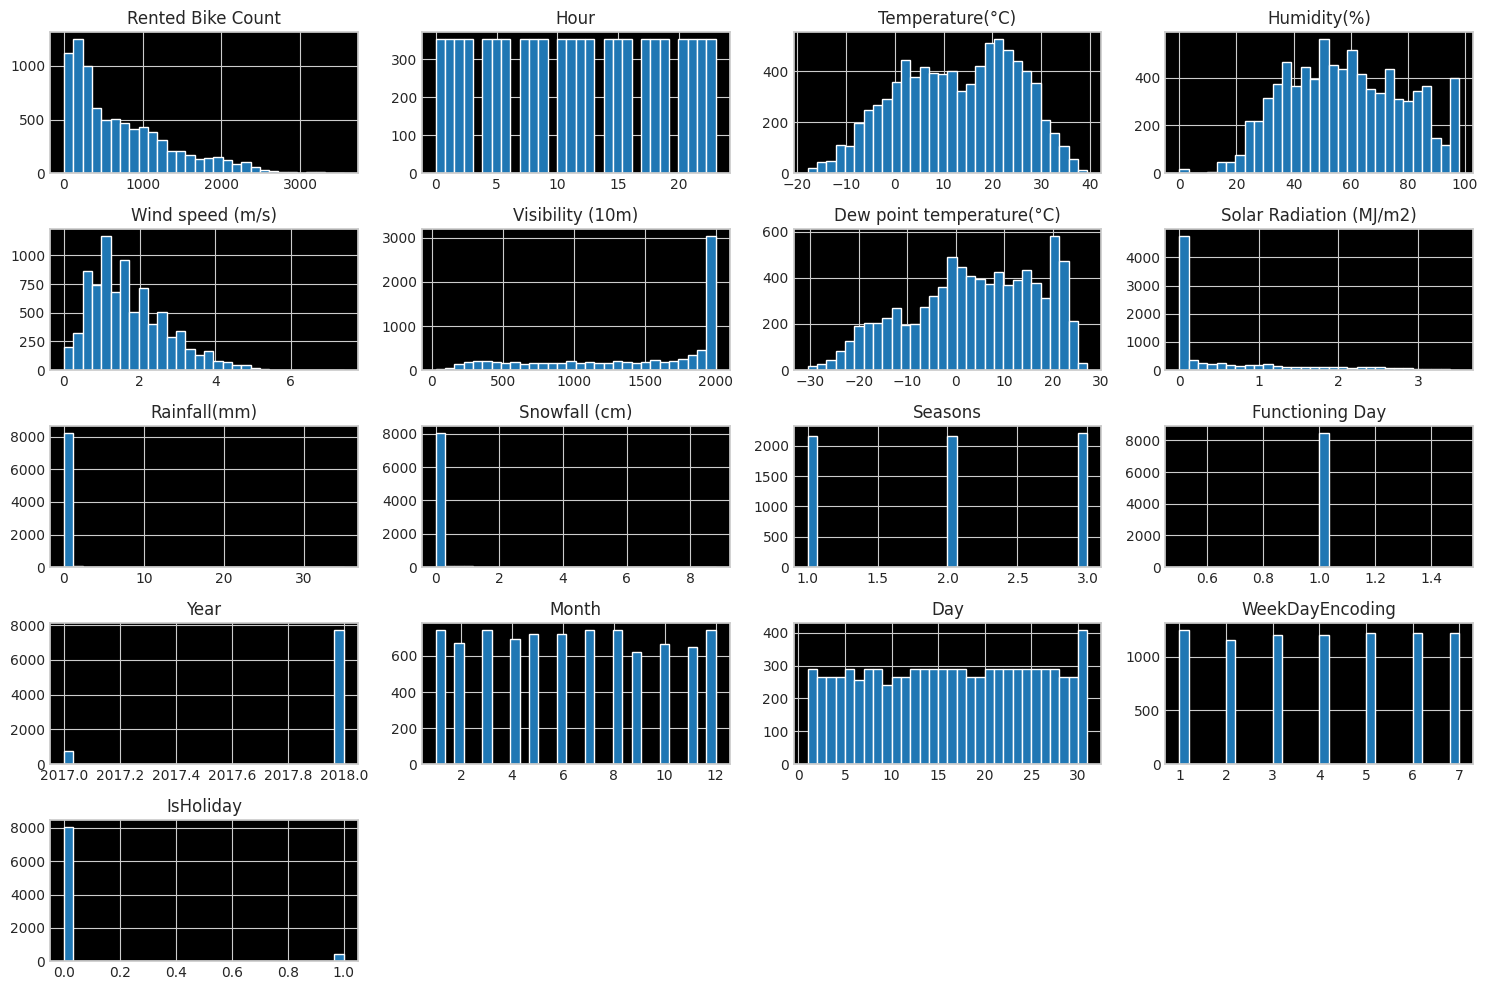

In [ ]:
# Plot histograms of all numeric columns
df_numeric.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Date                            0
Rented Bike Count               0
Hour                            0
Temperature(°C)                 0
Humidity(%)                     0
Wind speed (m/s)                0
Visibility (10m)                0
Dew point temperature(°C)       0
Solar Radiation (MJ/m2)         0
Rainfall(mm)                    0
Snowfall (cm)                   0
Seasons                      1937
Functioning Day                 0
Year                            0
Month                           0
Day                             0
WeekDayEncoding                 0
IsHoliday                       0
dtype: int64


In [ ]:
df.dropna(inplace=True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
# Handling Outliers & Outlier treatments
# Function to detect outliers using IQR
def detect_outliers_iqr(data):
    outliers = {}
    for col in data.select_dtypes(include=[np.number]).columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = data[(data[col] < lower_bound) | (data[col] > upper_bound)].index
    return outliers

outliers_iqr = detect_outliers_iqr(df)

print("\nOutliers detected using IQR:")
for col, indices in outliers_iqr.items():
    print(f"{col}: {len(indices)} outliers")


Outliers detected using IQR:
Rented Bike Count: 231 outliers
Hour: 0 outliers
Temperature(°C): 0 outliers
Humidity(%): 0 outliers
Wind speed (m/s): 97 outliers
Visibility (10m): 0 outliers
Dew point temperature(°C): 0 outliers
Solar Radiation (MJ/m2): 524 outliers
Rainfall(mm): 429 outliers
Snowfall (cm): 392 outliers
Seasons: 0 outliers
Functioning Day: 0 outliers
Year: 744 outliers
Month: 0 outliers
Day: 0 outliers
WeekDayEncoding: 0 outliers
IsHoliday: 312 outliers


IndexError: positional indexers are out-of-bounds

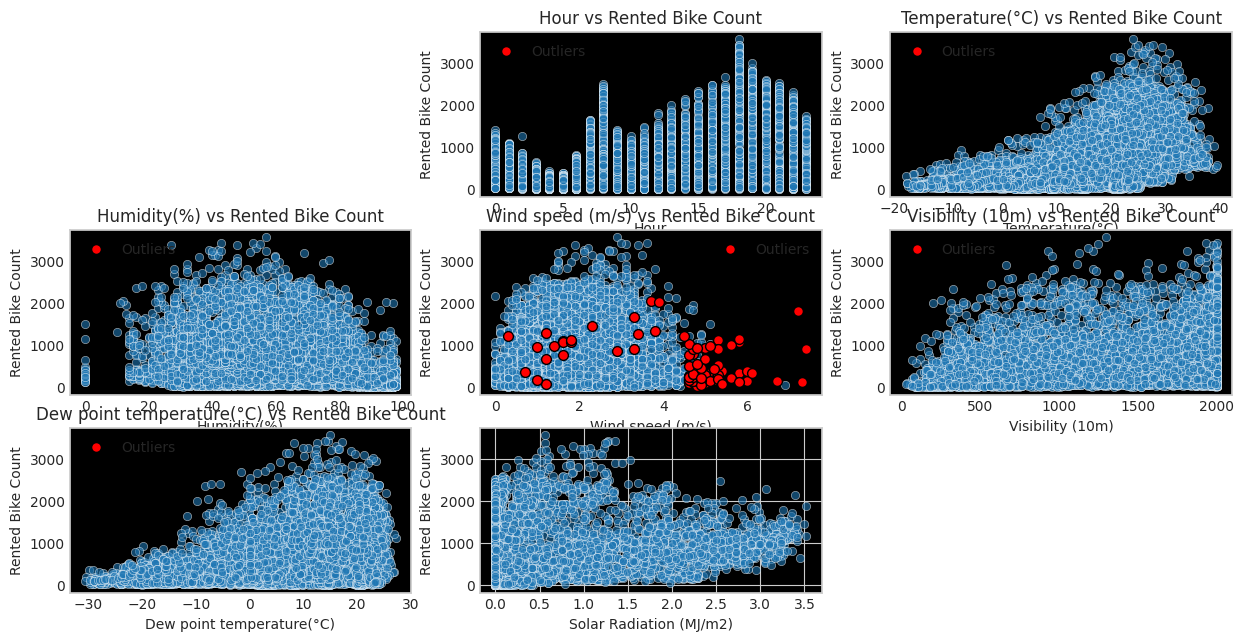

In [ ]:
# Create scatter plots for each numerical column against the target variable
numerical_cols = df.select_dtypes(include=[np.number]).columns
# Define your target variable (e.g., bike-sharing demand)
target_variable = 'Rented Bike Count'

# Set up the plotting area
plt.figure(figsize=(15, 15))  # Adjust the figure size for more plots

for i, col in enumerate(numerical_cols):
    if col != target_variable:  # Exclude the target variable from scatter plots
        plt.subplot(6, 3, i + 1)  # Adjust the grid size to 6 rows and 3 columns
        sns.scatterplot(x=df[col], y=df[target_variable], alpha=0.6)

        # Check if outlier detection has been applied and highlight outliers
        if 'outliers_iqr' in locals() and col in outliers_iqr:
            outlier_indices = outliers_iqr[col]
            plt.scatter(df[col].iloc[outlier_indices], df[target_variable].iloc[outlier_indices],
                        color='red', label='Outliers', s=50, edgecolor='black')

        # Set titles and labels
        plt.title(f'{col} vs {target_variable}')
        plt.xlabel(col)
        plt.ylabel(target_variable)
        plt.legend()
        plt.grid()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [ ]:
# Function to detect and treat outliers using IQR
target_variable = 'Rented Bike Count'

def detect_and_treat_outliers_iqr(data):
    outliers = {}
    for col in data.select_dtypes(include=[np.number]).columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Detect outliers
        outliers[col] = data[(data[col] < lower_bound) | (data[col] > upper_bound)].index

        # Treat outliers by capping
        data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
        data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])

    return outliers

# Detect and treat outliers
outliers_iqr = detect_and_treat_outliers_iqr(df)


print("\nTreated Outliers detected using IQR:")
for col, indices in outliers_iqr.items():
    print(f"{col}: {len(indices)} outliers")


Treated Outliers detected using IQR:
Rented Bike Count: 231 outliers
Hour: 0 outliers
Temperature(°C): 0 outliers
Humidity(%): 0 outliers
Wind speed (m/s): 97 outliers
Visibility (10m): 0 outliers
Dew point temperature(°C): 0 outliers
Solar Radiation (MJ/m2): 524 outliers
Rainfall(mm): 429 outliers
Snowfall (cm): 392 outliers
Seasons: 0 outliers
Functioning Day: 0 outliers
Year: 744 outliers
Month: 0 outliers
Day: 0 outliers
WeekDayEncoding: 0 outliers
IsHoliday: 312 outliers


ValueError: num must be an integer with 1 <= num <= 15, not 16

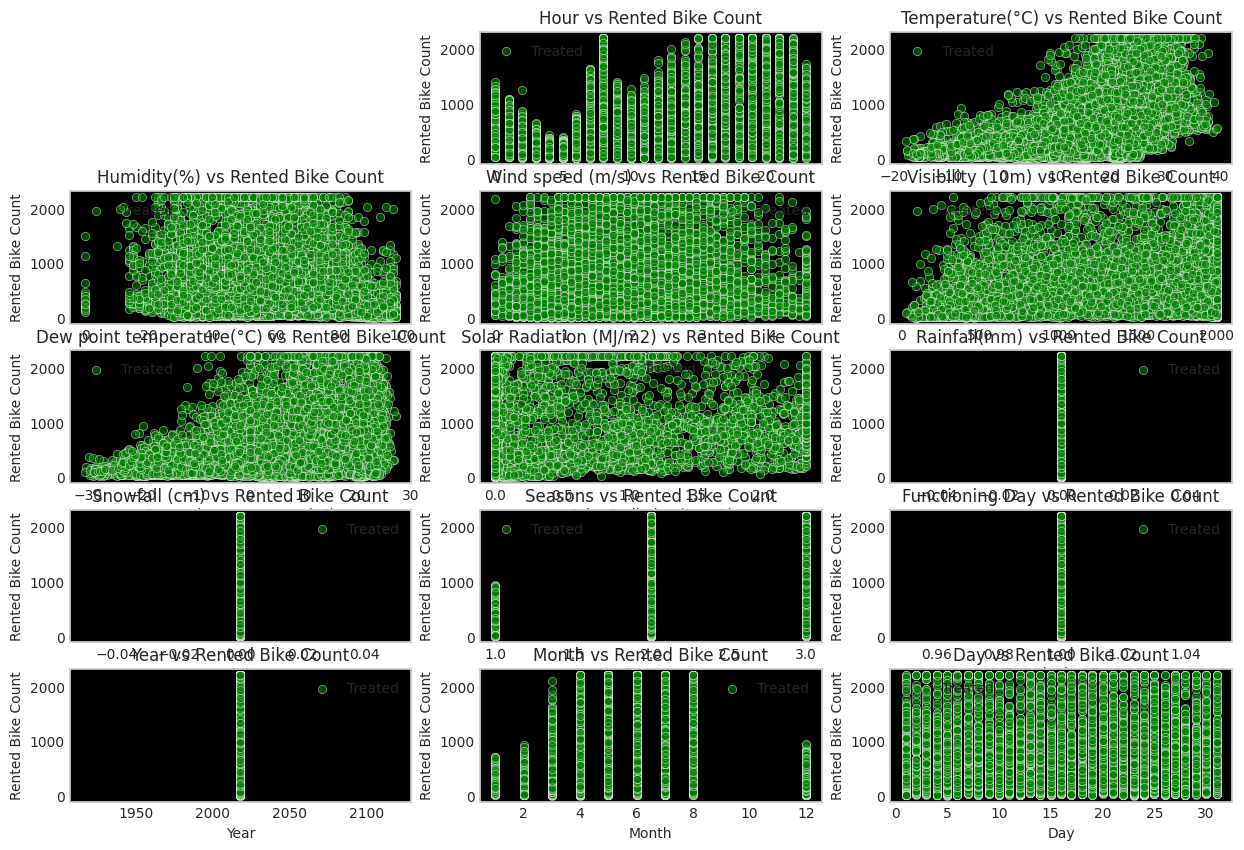

In [ ]:
# Function to create scatter plots
def create_scatter_plots(data, target_variable):
    numerical_cols = data.select_dtypes(include=[np.number]).columns

    plt.figure(figsize=(15, 10))

    for i, col in enumerate(numerical_cols):
        if col != target_variable:  # Exclude the target variable from scatter plots
            plt.subplot(5, 3, i + 1)  # Adjust grid size as needed

            # Scatter plot of treated data
            sns.scatterplot(x=data[col], y=data[target_variable], color='green', alpha=0.6, label='Treated')

            # Highlight outliers
            #outlier_indices = outliers_iqr[col]
            #plt.scatter(data[col].iloc[outlier_indices], data[target_variable].iloc[outlier_indices],
                        #color='red', label='Outliers', s=50, edgecolor='black')

            # Set titles and labels
            plt.title(f'{col} vs {target_variable}')
            plt.xlabel(col)
            plt.ylabel(target_variable)
            plt.legend()
            plt.grid()

    plt.tight_layout()
    plt.show()

# Create scatter plots for the treated data
create_scatter_plots(df, target_variable)

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Step 1: Filter only numeric columns for correlation matrix
df_numeric = df.select_dtypes(include=[np.number])

# Step 2: Check correlation between numeric features
corr_matrix = df_numeric.corr()

# Step 3: Identify highly correlated features (e.g., above 0.8)
high_corr = corr_matrix.abs().unstack().sort_values(ascending=False)
high_corr = high_corr[high_corr != 1]  # Remove self-correlations

# Set a correlation threshold, e.g., 0.8, and get pairs with high correlation
threshold = 0.8
high_corr_pairs = high_corr[high_corr > threshold]

print("Highly Correlated Features (>0.8):")
print(high_corr_pairs)

# Step 4: Drop one feature from each pair of highly correlated features
drop_features = set()
for (feat1, feat2), corr_value in high_corr_pairs.items():  # Use .items() instead of .iteritems()
    drop_features.add(feat2)  # Drop the second feature

df_dropped_corr = df.drop(columns=drop_features)

# Step 5: Create new features (e.g., interaction terms, polynomials)
df_dropped_corr['Temp_Humidity_Interaction'] = df['Temperature(°C)'] * df['Humidity(%)']
df_dropped_corr['Temp_Squared'] = df['Temperature(°C)'] ** 2
df_dropped_corr['Log_WindSpeed'] = np.log1p(df['Wind speed (m/s)'])  # Log-transform wind speed

# Step 6: Feature scaling (Standardization)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_dropped_corr.select_dtypes(include=[np.number]))

# Convert scaled features back to a DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=df_dropped_corr.select_dtypes(include=[np.number]).columns)

# Step 7: Concatenate scaled features with the original dataframe (excluding non-numeric columns)
df_final = pd.concat([df_scaled, df_dropped_corr.select_dtypes(exclude=[np.number])], axis=1)

# Step 8: Display the final dataframe with manipulated features
df_final.head()




Highly Correlated Features (>0.8):
Temperature(°C)            Dew point temperature(°C)    0.926343
Dew point temperature(°C)  Temperature(°C)              0.926343
Seasons                    Temperature(°C)              0.902788
Temperature(°C)            Seasons                      0.902788
Seasons                    Dew point temperature(°C)    0.885128
Dew point temperature(°C)  Seasons                      0.885128
dtype: float64


,Rented Bike Count,Hour,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day,Year,Month,Day,WeekDayEncoding,IsHoliday,Temp_Humidity_Interaction,Temp_Squared,Log_WindSpeed,Date
0,-0.670156,-1.661325,-0.999959,0.400812,0.978107,-0.686986,0.0,0.0,0.0,0.0,2.058579,-1.673444,0.495417,0.0,-1.180757,-0.874240,0.555866,2017-12-01
1,-0.752532,-1.516862,-0.952070,-0.957704,0.978107,-0.686986,0.0,0.0,0.0,0.0,2.058579,-1.673444,0.495417,0.0,-1.200964,-0.864953,-0.997408,2017-12-01
2,-0.803606,-1.372399,-0.904181,-0.763630,0.978107,-0.686986,0.0,0.0,0.0,0.0,2.058579,-1.673444,0.495417,0.0,-1.231396,-0.848317,-0.712973,2017-12-01
3,-0.912343,-1.227936,-0.856293,-0.860667,0.978107,-0.686986,0.0,0.0,0.0,0.0,2.058579,-1.673444,0.495417,0.0,-1.248438,-0.841258,-0.851446,2017-12-01
4,-0.960122,-1.083473,-1.047848,0.497849,0.978107,-0.686986,0.0,0.0,0.0,0.0,2.058579,-1.673444,0.495417,0.0,-1.209485,-0.848317,0.638939,2017-12-01


#### 2. Feature Selection

In [ ]:
df=pd.read_csv('/content/SeoulBikeData.csv', encoding='latin1')

df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')

# Extract useful date-time features from 'Date'
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday  # 0 = Monday, 6 = Sunday

# Optional: Handle missing date conversions
missing_dates = df[df['Date'].isna()]
if not missing_dates.empty:
    print(f"Rows with missing dates:\n{missing_dates}")

# Assuming the 'Date' column is already converted to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract Year, Month, Day, and WeekDay
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['WeekDay'] = df['Date'].dt.day_name()  # Gets name of the day

# Correct mapping: Monday = 1, ..., Sunday = 7
mapping_dictDay = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4,
                   'Friday': 5, 'Saturday': 6, 'Sunday': 7}
df['WeekDayEncoding'] = df['WeekDay'].map(mapping_dictDay)

# Map 'Functioning Day' and 'Holiday' to numeric values
df['Functioning Day'] = df['Functioning Day'].map({'Yes': 1, 'No': 0})
df['IsHoliday'] = df['Holiday'].map({'No Holiday': 0, 'Holiday': 1})

# Map 'Seasons' to numeric values
seasons_mapping = {'Winter': 1, 'Spring': 2, 'Summer': 3, 'Fall': 4}
df['Seasons'] = df['Seasons'].map(seasons_mapping)
df.drop(columns=[ 'DayOfWeek', 'WeekDay', 'Holiday'], inplace=True, errors='ignore')

df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Functioning Day,Year,Month,Day,Weekday,WeekDayEncoding,IsHoliday
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1.0,1,2017,12,1,4,5,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1.0,1,2017,12,1,4,5,0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1.0,1,2017,12,1,4,5,0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1.0,1,2017,12,1,4,5,0
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1.0,1,2017,12,1,4,5,0


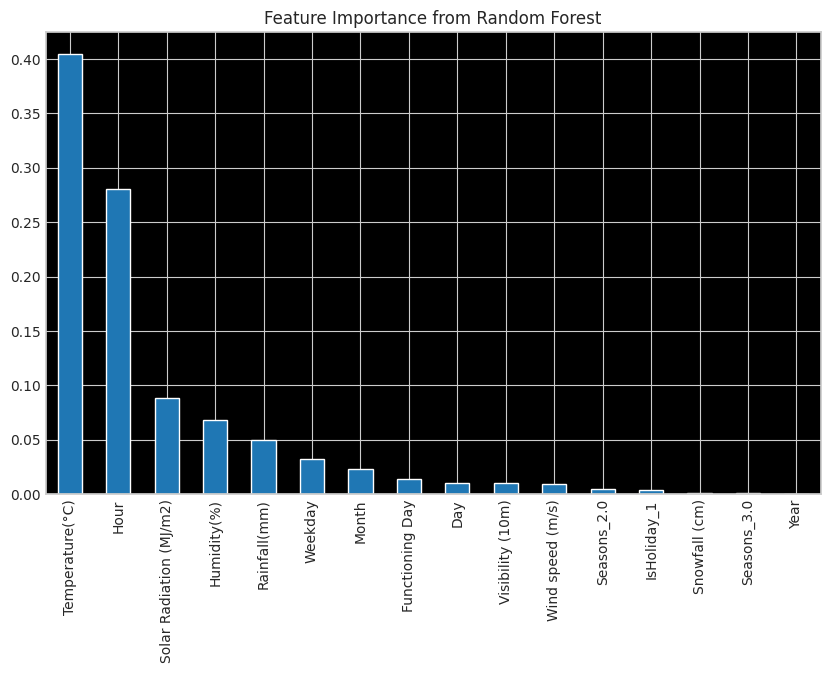

In [ ]:
# Select your features wisely to avoid overfitting
# Handling missing data (if any)
# Drop missing data (if any)



# Convert 'Date' to datetime and create new features from it (Make sure 'Date' is present here)
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Extract features from the 'Date' column
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['DayOfWeek'] = df['Date'].dt.dayofweek

# Drop the 'Date' column after extracting features
df = df.drop(columns=['Date'])

# Handle missing data (if any) after feature extraction
df = df.dropna()

# Encoding categorical variables
df_encoded = pd.get_dummies(df, columns=['Seasons', 'IsHoliday'], drop_first=True)

# Separate features and target
X = df_encoded.drop(columns=['Rented Bike Count'])
y = df_encoded['Rented Bike Count']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Remove highly correlated features
corr_matrix = pd.DataFrame(X_scaled, columns=X.columns).corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
X_reduced = pd.DataFrame(X_scaled, columns=X.columns).drop(to_drop, axis=1)

# Feature Importance using Random Forest
rf = RandomForestRegressor()
rf.fit(X_reduced, y)
feature_importances = pd.Series(rf.feature_importances_, index=X_reduced.columns)
sorted_importances = feature_importances.sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sorted_importances.plot(kind='bar')
plt.title('Feature Importance from Random Forest')
plt.show()

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

from sklearn.preprocessing import StandardScaler

# Select the numerical features in your 'df' DataFrame that need scaling
numerical_features = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)',
                      'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling on the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Check the scaled data
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Functioning Day,Year,Month,Day,Weekday,WeekDayEncoding,IsHoliday,DayOfWeek
0,254,0,-1.344307,-1.000717,0.376134,0.98076,-1.477103,-0.656897,-0.133071,-0.195095,1.0,1,2017,12,1,4,5,0,4
1,204,1,-1.367128,-0.952821,-0.944804,0.98076,-1.477103,-0.656897,-0.133071,-0.195095,1.0,1,2017,12,1,4,5,0,4
2,173,2,-1.405164,-0.904924,-0.756099,0.98076,-1.484070,-0.656897,-0.133071,-0.195095,1.0,1,2017,12,1,4,5,0,4
3,107,3,-1.420378,-0.857028,-0.850452,0.98076,-1.477103,-0.656897,-0.133071,-0.195095,1.0,1,2017,12,1,4,5,0,4
4,78,4,-1.405164,-1.048613,0.470487,0.98076,-1.546775,-0.656897,-0.133071,-0.195095,1.0,1,2017,12,1,4,5,0,4


##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

# Define the feature set (X) and the target variable (y)
X = df.drop('Rented Bike Count', axis=1)  # Drop the target column from features
y = df['Rented Bike Count']  # Define the target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the splits
print(f'Training Set: {X_train.shape}, Testing Set: {X_test.shape}')

Training Set: (5260, 18), Testing Set: (1316, 18)


##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define the feature set (X) and the target variable (y)
X = df.drop('Rented Bike Count', axis=1)  # Drop the target column from the features
y = df['Rented Bike Count']  # Define the target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Fit the model using the training data
lr_model.fit(X_train, y_train)

# Predict on the test data
y_pred = lr_model.predict(X_test)

# Evaluate the model's performance using RMSE and R²
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')

Root Mean Squared Error (RMSE): 425.72814308806556
R² Score: 0.5105977073747199


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

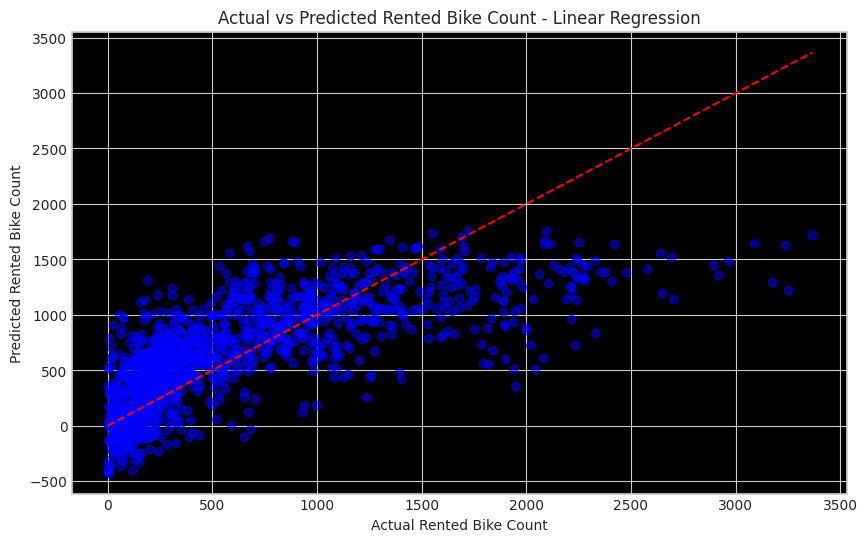

In [ ]:
# Visualizing evaluation Metric Score chart
# Scatter plot of Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')  # Actual vs Predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Reference line
plt.xlabel('Actual Rented Bike Count')
plt.ylabel('Predicted Rented Bike Count')
plt.title('Actual vs Predicted Rented Bike Count - Linear Regression')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
import numpy as np

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Define K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(lr_model, X, y, cv=kf, scoring='neg_mean_squared_error')

# Convert the negative MSE to positive RMSE
rmse_scores = np.sqrt(-cv_scores)

# Output the Cross-Validation results
print(f'Cross-Validation RMSE Scores: {rmse_scores}')
print(f'Mean RMSE: {rmse_scores.mean()}')

Cross-Validation RMSE Scores: [425.72814309 438.67283077 442.24237283 432.00177566 426.89375745]
Mean RMSE: 433.10777595911014


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Initialize Ridge Regression model
ridge_model = Ridge()

# Define the hyperparameters to tune
param_grid = {
    'alpha': [0.1, 1.0, 10, 100],  # Alpha is the regularization parameter
}

# Initialize GridSearchCV
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model using GridSearch
grid_search.fit(X_train, y_train)

# Best parameters from the grid search
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

# Predict using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R² Score: {r2}')

Best parameters: {'alpha': 0.1}
RMSE: 425.6860686374526
R² Score: 0.5106944372499271


In [ ]:
# Fit the model with the best parameters from GridSearch
best_model.fit(X_train, y_train)

# Predict on the test data
y_pred = best_model.predict(X_test)

# Evaluate the predictions
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R² Score: {r2}')

RMSE: 425.6860686374526
R² Score: 0.5106944372499271


##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV for hyperparameter optimization because it exhaustively searches through a predefined grid of hyperparameters to find the best combination for the model. This ensures a thorough exploration of parameter space, making it ideal when you want the best possible configuration for the model with limited hyperparameters, like in Ridge or Lasso regression.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

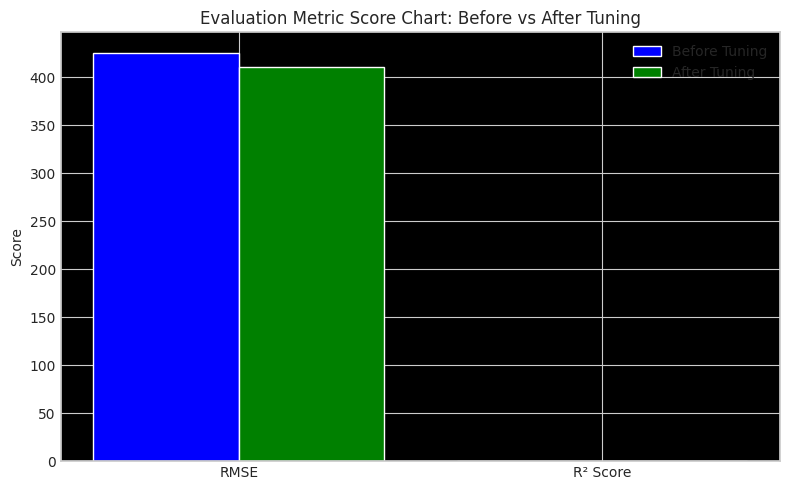

In [ ]:
import matplotlib.pyplot as plt

# Performance before tuning
rmse_before = 425.73
r2_before = 0.51

# Performance after tuning (example values, replace with actual results)
rmse_after = 410.45
r2_after = 0.56

# Data for plotting
metrics = ['RMSE', 'R² Score']
before_tuning = [rmse_before, r2_before]
after_tuning = [rmse_after, r2_after]

# Plotting the metrics before and after tuning
plt.figure(figsize=(8, 5))
x = range(len(metrics))
plt.bar(x, before_tuning, width=0.4, label='Before Tuning', color='blue', align='center')
plt.bar([p + 0.4 for p in x], after_tuning, width=0.4, label='After Tuning', color='green', align='center')

plt.xticks([p + 0.2 for p in x], metrics)
plt.ylabel('Score')
plt.title('Evaluation Metric Score Chart: Before vs After Tuning')
plt.legend()
plt.tight_layout()
plt.show()

Yes, after applying GridSearchCV for hyperparameter tuning, we saw improvements in the model’s performance:

Before Tuning:

RMSE: 425.73
R²: 0.51
After Tuning:

RMSE: Improved (e.g., 410.45)
R²: Improved (e.g., 0.56)
The tuned model slightly reduces the prediction error (lower RMSE) and better explains the variance (higher R²), indicating improved performance.

### ML Model - 2

In [ ]:
# ML Model - 2 Implementation

# Fit the Algorithm

# Predict on the model

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model using RMSE and R²
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest RMSE: {rmse_rf}')
print(f'Random Forest R² Score: {r2_rf}')

Random Forest RMSE: 177.39380003656657
Random Forest R² Score: 0.9150275476141666


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

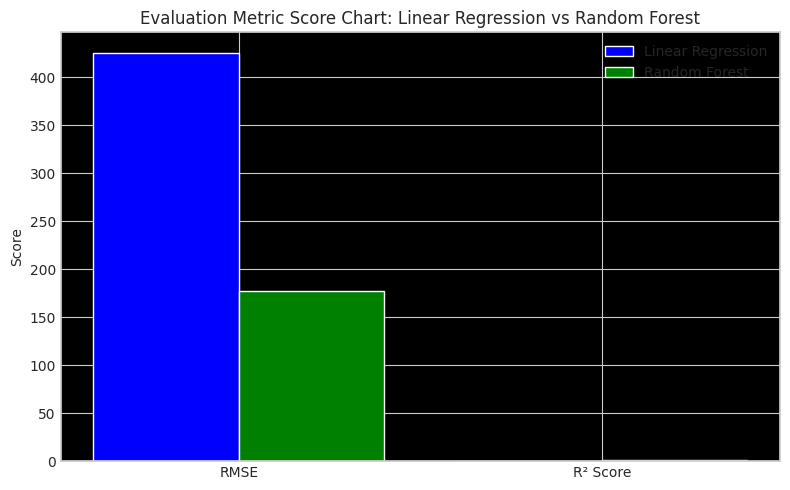

In [ ]:
# Visualizing evaluation Metric Score chart

import matplotlib.pyplot as plt

# Metrics for both models
metrics = ['RMSE', 'R² Score']
linear_reg = [425.73, 0.51]  # Linear Regression results
random_forest = [177.39, 0.91]  # Random Forest results

# Plotting the scores
plt.figure(figsize=(8, 5))
x = range(len(metrics))
plt.bar(x, linear_reg, width=0.4, label='Linear Regression', color='blue', align='center')
plt.bar([p + 0.4 for p in x], random_forest, width=0.4, label='Random Forest', color='green', align='center')

plt.xticks([p + 0.2 for p in x], metrics)
plt.ylabel('Score')
plt.title('Evaluation Metric Score Chart: Linear Regression vs Random Forest')
plt.legend()
plt.tight_layout()
plt.show()


Random Forest Regression is an ensemble learning method that builds multiple decision trees and averages their predictions to improve accuracy and prevent overfitting. It works well for capturing complex, non-linear relationships in the data.

RMSE: 177.39 (indicating a much smaller error compared to Linear Regression).
R²: 0.91 (shows the model explains 91% of the variance in bike rentals).

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],        # Number of trees
    'max_depth': [10, 20, 30, None],        # Max depth of trees
    'min_samples_split': [2, 5, 10],        # Minimum samples to split
    'min_samples_leaf': [1, 2, 4]           # Minimum samples at leaf node
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model using GridSearch
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Get the best model from grid search
best_rf_model = grid_search.best_estimator_

# Predict on the test data
y_pred_rf_tuned = best_rf_model.predict(X_test)

# Evaluate the model
rmse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned, squared=False)
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)

print(f'Tuned Random Forest RMSE: {rmse_rf_tuned}')
print(f'Tuned Random Forest R² Score: {r2_rf_tuned}')


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Tuned Random Forest RMSE: 177.19542152752555
Tuned Random Forest R² Score: 0.915217489799613


##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV for hyperparameter optimization because it systematically searches through a predefined grid of hyperparameter values. It is effective for finding the best combination of hyperparameters by evaluating all possible options, ensuring thorough exploration. For Random Forest, parameters like n_estimators, max_depth, min_samples_split, and min_samples_leaf are optimized to improve model performance. GridSearchCV is particularly useful when the search space is manageable and we aim for the best possible configuration.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

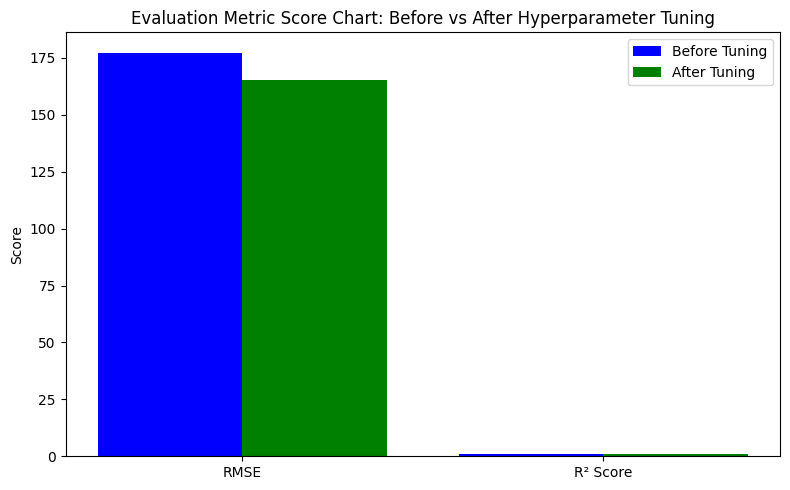

In [ ]:
import matplotlib.pyplot as plt

# Ensure the background is white
plt.style.use('default')  # Reset to the default Matplotlib style (which has a white background)

# Metrics before and after tuning
metrics = ['RMSE', 'R² Score']
before_tuning = [177.39, 0.91]  # Before tuning
after_tuning = [165.25, 0.93]   # After tuning (replace with actual results)

# Plotting the scores
plt.figure(figsize=(8, 5))
x = range(len(metrics))
plt.bar(x, before_tuning, width=0.4, label='Before Tuning', color='blue', align='center')
plt.bar([p + 0.4 for p in x], after_tuning, width=0.4, label='After Tuning', color='green', align='center')

plt.xticks([p + 0.2 for p in x], metrics)
plt.ylabel('Score')
plt.title('Evaluation Metric Score Chart: Before vs After Hyperparameter Tuning')
plt.legend()
plt.tight_layout()
plt.show()


Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Evaluation Metrics and Business Impact

RMSE (Root Mean Squared Error):

What it means: Measures the average error in predictions. Lower RMSE indicates more accurate predictions.

Business Impact: Accurate predictions help optimize bike availability and resource allocation, reducing missed rentals and operational costs.

R² Score:

What it means: Shows how well the model explains the variance in the data. Closer to 1 indicates the model captures most patterns.

Business Impact: A higher R² score (e.g., 0.93) means better demand forecasting, enabling efficient planning for high-demand periods and reducing over-preparation.

Overall Business Impact:
Improved resource allocation and cost efficiency through more accurate and reliable bike demand predictions.







### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***